# Supermarket Sales Analysis

The data consist of 3 months transaction details of a supermarket with 3 branches in 3 different cities. Where data has 17 variables with 1000 transactions. The super market has two types of customers Member & Normal. There are 6 different Product categories are sold in these supermarkets. E-wallet , cash , credit-card payments are accepted in these supermarkets. The Supermarkets are open all days from Monday- Sunday. Timings of supermarket is from 10 am to 8pm. All transactions in the supermarket has unique Invoice ID. 


In [1]:
#importing libraries
import pandas as pd                   #pandas to import data, handle data type etc.
import numpy as np                    #for numerical functions and calculations
import matplotlib.pyplot as plt      #data visualization
import seaborn as sns                #data vizualization

In [2]:
#importing excel data
df= pd.read_excel('D:\DATA SCIENCE\Odin schools\Mock\\supermarket_sales.xlsx')   

# Explanatory Data Analysis

In [101]:
df.head(10)             #first 10 rows of data.

,Invoice ID,Branch,City_code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,Hour,session
0,750-67-8428,A,CT1,Member,Female,PD1,74.690000,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,13,Noon
1,226-31-3081,C,CT3,Normal,Female,PD2,15.280000,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,4,10,Morning
2,631-41-3108,A,CT1,Normal,Male,PD3,46.330000,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,6,13,Noon
3,123-19-1176,A,CT1,Member,Male,PD1,58.220000,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,6,20,Eve
4,373-73-7910,A,CT1,Normal,Male,PD4,86.310000,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,4,10,Morning
5,699-14-3026,C,CT3,Normal,Male,PD2,85.390000,7,29.8865,627.6165,2019-03-25,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,0,18,Eve
6,355-53-5943,A,CT1,Member,Female,PD2,68.840000,6,20.6520,433.6920,2019-02-25,14:36:00,Ewallet,413.04,4.761905,20.6520,5.8,0,14,Noon
7,315-22-5665,C,CT3,Normal,Female,PD3,73.560000,10,36.7800,772.3800,2019-02-24,11:38:00,Ewallet,735.60,4.761905,36.7800,8.0,6,11,Morning
8,665-32-9167,A,CT1,Member,Female,PD1,55.755142,2,3.6260,76.1460,2019-01-10,17:15:00,Credit card,72.52,4.761905,3.6260,7.2,3,17,Eve
9,692-92-5582,B,CT9,Member,Female,PD5,54.840000,3,8.2260,172.7460,2019-02-20,13:27:00,Credit card,164.52,4.761905,8.2260,5.9,2,13,Noon


In [4]:
df.shape

(1000, 17)

Data is uploaded as expected. Data consist of 1000 rows and 17 columns. As we can observe here PD1 of branch A unit price differentiate each time. So, Product code is a category of products. Also we can observe each city has one branch. 

In [5]:
#data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   city code                1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product code             1000 non-null   object        
 6   Unit price               996 non-null    object        
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

Data consist of 1000 rows and 17 columns , where Unit price & Rating are having missing values. Data has 6 categorical variables, 9 Numerical variables and 2 Datetime variables(Date & Time). Unit price & Payment has numerical values but has object data type. And Time is also represented as Object

# Missing values

In [6]:
#summing missing values in  each column
df.isnull().sum()

Invoice ID                 0
Branch                     0
city code                  0
Customer type              0
Gender                     0
Product code               0
Unit price                 4
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     7
dtype: int64

Unit price has 4 missing values and Rating has 7 missing values

In [7]:
#converting Unit price object to float type using pandas 
df['Unit price']=pd.to_numeric(df['Unit price'],errors = 'coerce')  #coerce will convert the non numeric values to NaN

Checking the distribution of Unit price, Rating to impute with right parameter suitable for missing values of respective coloumns

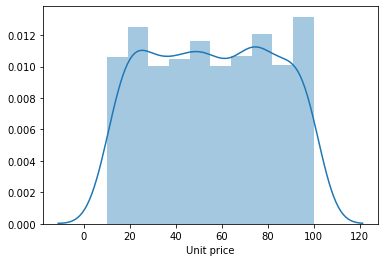

In [8]:
#distribution plot using Seaborn
sns.distplot(df['Unit price'], kde=True)    #kde to plot a gaussian kernel density estimate.

The distribution of Unit price looks uniform from the above plot and the unit price of products lies between 20 and 100.

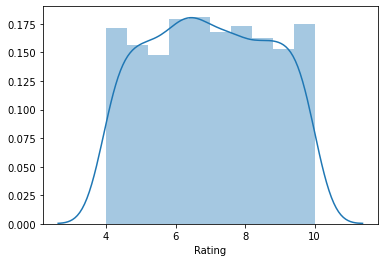

In [9]:
sns.distplot(df['Rating'], kde=True)

The distribution of Rating looks uniform from the above plot and rating lies between 4 and 10 

Since both the columns are uniformly distributed, imputing with mean will be the better approach.

In [10]:
df['Unit price']=df['Unit price'].fillna(df['Unit price'].mean())
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

# Unique Values

In [11]:
#Unique values of Invoice ID with shape
df['Invoice ID'].unique().shape

(1000,)

Invoice ID has all 1000 unique observations as it is a each transaction's unique identity.

In [12]:
#unique values 
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

Branch is a Nominal data where we can see there are three branches  A,B,C

In [13]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

Customer type is a Nominal data where we can see there are two types  Member and Normal

In [14]:
df['Product code'].unique()

array(['PD1', 'PD2', 'PD3', 'PD4', 'PD5', 'PD6'], dtype=object)

Product code is a Nominal data where there are 6 categories of Products PD1,PD2,PD3,PD4,PD5,PD6

In [15]:
dict = {'city code ': 'City_code'}  #creating a dictionary to rename column
df.rename(columns=dict,             # using rename function to rename City_code column
          inplace=True)
df.head(1)                  #crosscheck column name
  

,Invoice ID,Branch,City_code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1


Renamed city code to City_code as there was an extra space in name.

In [16]:
df['City_code'].unique()

array(['CT1', 'CT3', 'CT9'], dtype=object)

City code is a Nominal data where there are three cities CT1,CT3,CT9

In [17]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

Gender is a Nominal data where there are Male & Female

In [18]:
df['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

Payment is a Nominal data where there are 3 payment methods

In [19]:
df['Rating'].unique()

array([ 9.1       ,  9.6       ,  7.4       ,  8.4       ,  5.3       ,
        4.1       ,  5.8       ,  8.        ,  7.2       ,  5.9       ,
        4.5       ,  6.8       ,  7.1       ,  6.96616314,  5.7       ,
        4.6       ,  6.9       ,  8.6       ,  4.4       ,  4.8       ,
        5.1       ,  9.9       ,  6.        ,  8.5       ,  6.7       ,
        7.7       ,  7.5       ,  7.        ,  4.7       ,  7.6       ,
        7.9       ,  6.3       ,  5.6       ,  9.5       ,  8.1       ,
        6.5       ,  6.1       ,  8.2       ,  6.6       ,  5.4       ,
        9.3       , 10.        ,  6.4       ,  4.3       ,  4.        ,
        8.7       ,  9.4       ,  5.5       ,  8.3       ,  7.3       ,
        4.9       ,  4.2       ,  9.2       ,  7.8       ,  5.2       ,
        9.        ,  8.8       ,  6.2       ,  9.8       ,  9.7       ,
        5.        ,  8.9       ])

Rating is measurable and has intermediate values so it is a float type

# Statistical observation

In [20]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000
mean,55.755142,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.966163
std,26.368345,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.713265
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.000000
25%,33.247500,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.500000
50%,55.755142,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,6.966163
75%,77.690000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.425000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.000000


Count shows now each column consist of 1000 rows. Mean shows the average of each column. And std shows the standard deviation i.e dispersion of each column. 

Observation:

gross margin percentage have same values in whole column as we can see min,max,median,25%,75% are same.

Minimum rating given is 4 and max is 10.

Maximum of 10 quantities of products are sold for a transaction.

Max unit price of a product is 99.96. 

# Data Visualization

# Univariate Analysis

Uni-variate analysis is the analysis involving a single variable 

Text(0, 0.5, 'No of transactions')

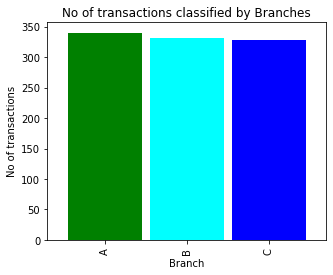

In [21]:
 #kind: bar plot, width will give space between bars, color for colour, figsize : size of plot , title : Name of plot
df['Branch'].value_counts().plot(kind='bar',width=0.9,color=['green','cyan','Blue'],
                                    figsize=(5,4),
                                    title="No of transactions classified by Branches") 
plt.xlabel("Branch")                    #labels X axis                                                         
plt.ylabel("No of transactions")        #labels y axis

There is not much difference in customers in the 3 branches of A, B and C. The sales in branch A is a bit higher customers than the rest of the branches.

Text(0, 0.5, 'No of transactions ')

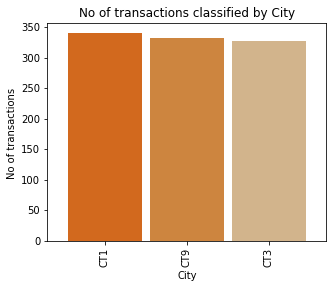

In [71]:
 #kind: bar plot, width will give space between bars, color for colour, figsize : size of plot , title : Name of plot

df['City_code'].value_counts().plot(kind='bar',width=0.9,
                                    figsize=(5,4),
                                    title="No of transactions classified by City",color=['chocolate','peru','tan'])
plt.xlabel("City")
plt.ylabel("No of transactions ")

There is not much difference in transactions across the 3 cities of . The sales in CT1 is a bit higher than the rest of the cities.
Here we can say that Each city has one branch where CT1 - Branch A, CT9 - Branch B, CT3 - Branch C

Text(0, 0.5, 'No of transactions')

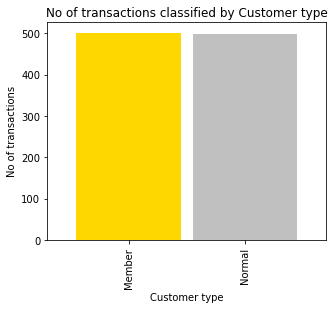

In [72]:
df['Customer type'].value_counts().plot(kind='bar',width=0.9,
                                    figsize=(5,4),
                                    title="No of transactions classified by Customer type",color=['gold','silver'])
plt.xlabel("Customer type")
plt.ylabel("No of transactions")

There is not much difference between Member and Normal.

Text(0, 0.5, 'No of transactions')

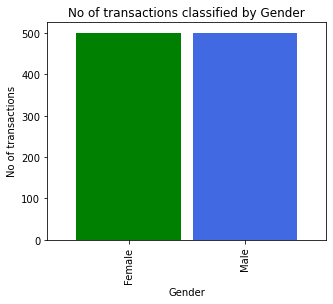

In [73]:
df['Gender'].value_counts().plot(kind='bar',width=0.9,
                                    figsize=(5,4),
                                    title="No of transactions classified by Gender",color=['green','royalblue'])
plt.xlabel("Gender")
plt.ylabel("No of transactions")

There is not much difference between Male and female

Text(0, 0.5, 'No of transactions')

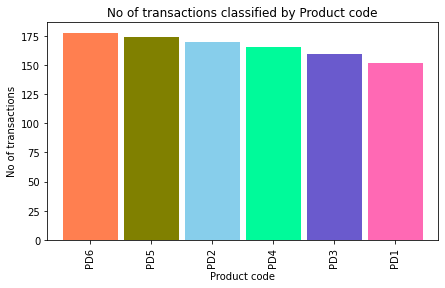

In [64]:
df['Product code'].value_counts().plot(kind='bar',width=0.9,
                                    figsize=(7,4),
                                    title="No of transactions classified by Product code",color=['coral','olive','skyblue','mediumspringgreen','slateblue','hotpink'])
plt.xlabel("Product code")
plt.ylabel("No of transactions")

Product PD6 is bought most of the time in all transactions whereas PD1 is bought least.

Note: This does not represent the sales of Product as Quantity varies.

Text(0, 0.5, 'No of transactions')

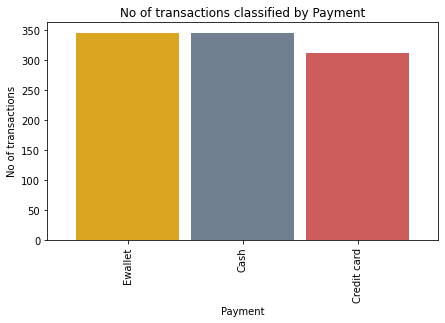

In [65]:
df['Payment'].value_counts().plot(kind='bar',width=0.9,
                                    figsize=(7,4),
                                    title="No of transactions classified by Payment",color=['goldenrod','slategrey','indianred'])
plt.xlabel("Payment")
plt.ylabel("No of transactions")

Most of the customers prefer to pay through E wallet and cash.

# Rating Inspection

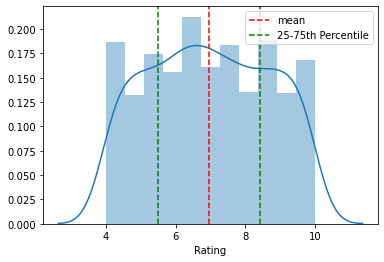

0.014379474120780908

In [27]:
# Customer rating
sns.distplot(df['Rating'], kde=True)

#adding vertical line to represent the mean Rating
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')

#adding vertical line for the 25th and 75th percentile
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label='25-75th Percentile')
plt.axvline(x=np.percentile(df['Rating'],75),c='green', ls='--')
plt.legend() #legend to show mean, IQR
plt.show()   
df['Rating'].skew() #skewness of the data which shows distribution.

The distribution of Rating is normal, the data lies between 4 & 10. Mean of the rating is at approxmaitely 7.

Text(0.5, 1.0, 'Product code w.r.t Rating')

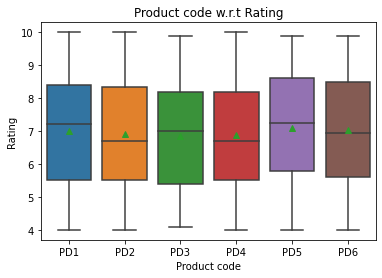

In [28]:
#Rating according to Product code
sns.boxplot(x = df['Product code'],
            y = df['Rating'],showmeans=True).set_title('Product code w.r.t Rating')

The median of PD2 is less than other Product categories. And PD5 median is high compare to other Product category ratings. So there should be improvement in PD2 category.

Text(0.5, 1.0, 'Product code w.r.t Branch')

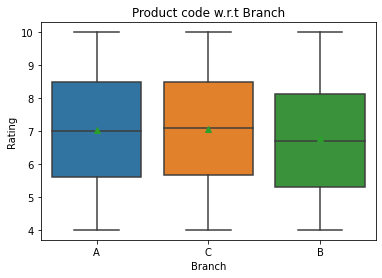

In [29]:
#Rating according to Branch 
sns.boxplot(x = df['Branch'],
            y = df['Rating'],showmeans=True).set_title('Product code w.r.t Branch')

Branch B has very less rating when compared to other branches. There should be improvement in service of Branch B.

Text(0.5, 1.0, 'Product code w.r.t City_code')

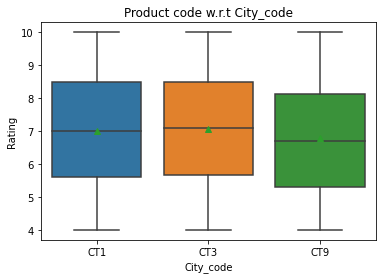

In [30]:
#Rating according to City code
sns.boxplot(x = df['City_code'],
            y = df['Rating'],showmeans=True).set_title('Product code w.r.t City_code') #Box plot using seaborn

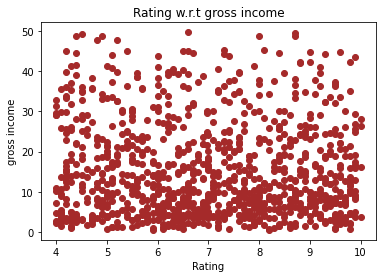

In [76]:
plt.scatter(df['Rating'], df['gross income'],color=['brown'])  #scatter plot to compare two numerical variables
plt.xlabel('Rating')                            # to label x- axis
plt.ylabel('gross income')                      #to label y- axis
plt.title('Rating w.r.t gross income')        #to name the plot
plt.show()

There is no linear correlation between gross income and Rating.

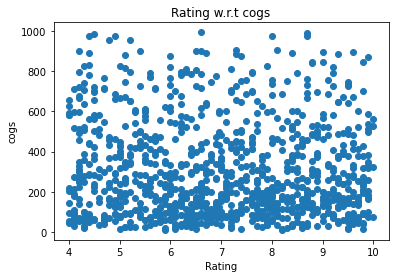

In [32]:
plt.scatter(df['Rating'], df['cogs'])
plt.xlabel('Rating')
plt.ylabel('cogs')
plt.title('Rating w.r.t cogs')
plt.show()

There is no linear correlation between cogs and Rating

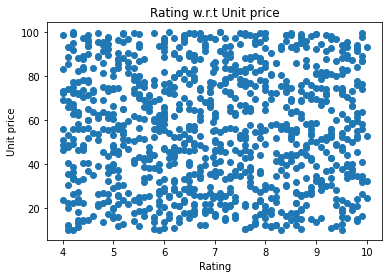

In [33]:
plt.scatter(df['Rating'], df['Unit price'])
plt.xlabel('Rating')
plt.ylabel('Unit price')
plt.title('Rating w.r.t Unit price')
plt.show()

There is no linear correlation between Unit price and Rating

Text(0.5, 1.0, 'Rating trend')

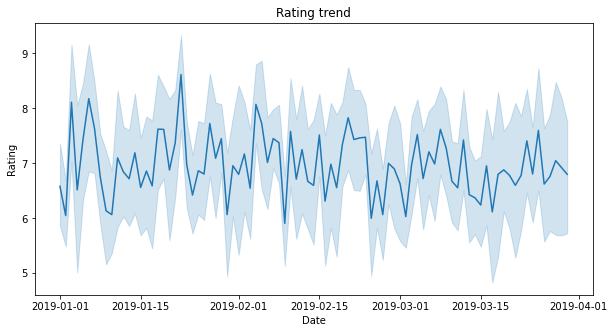

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))              #size of the graph
sns.lineplot(x="Date",  y = 'Rating',data =df,ax=ax)           #lineplot using seaborn 
plt.title("Rating trend")                                      # name  of plot

Rating does not follow any trend but we can see huge drop of trend line in lot of dates. 

# Gross Income inspection

Text(0.5, 1.0, 'gross income trend')

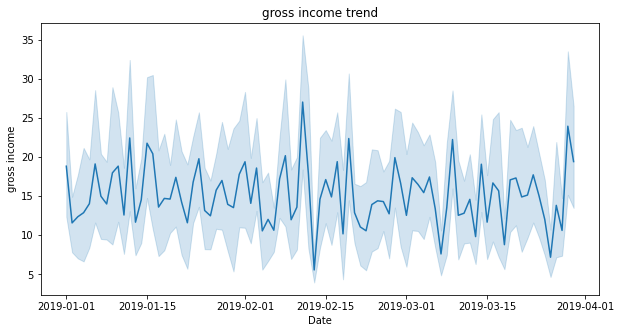

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))                       #Plot size
sns.lineplot(x="Date",  y = 'gross income',data =df,ax=ax)      #line plot using seaborn
plt.title("gross income trend")                                  # name of plot

The gross income does not follow any trend. There is huge drop of trend line at the almost middle of 2nd month. 

Text(0.5, 1.0, 'Gross income w.r.t Branch  ')

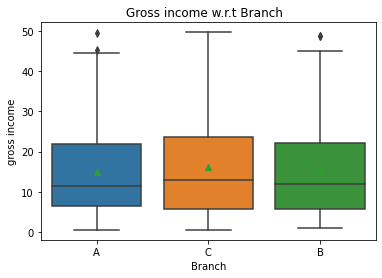

In [36]:
#Gross income according to Branch
sns.boxplot(x = df['Branch'],
            y = df['gross income'],showmeans=True).set_title('Gross income w.r.t Branch  ')

Gross income of Branch C is higher than A & B. Branch A has lesser gross income than C & B. 

Text(0.5, 1.0, 'Gross income w.r.t Customer type  ')

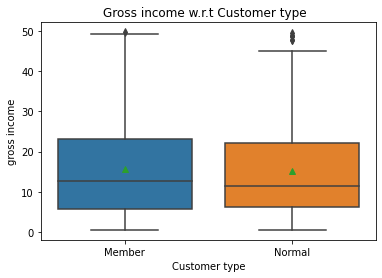

In [37]:
#Gross income according to Customer type
sns.boxplot(x = df['Customer type'],
            y = df['gross income'],showmeans=True).set_title('Gross income w.r.t Customer type  ')

There is not much difference between gross income from Members & Normal customers, but members are slightly high.

Text(0.5, 1.0, 'Gross income w.r.t Gender ')

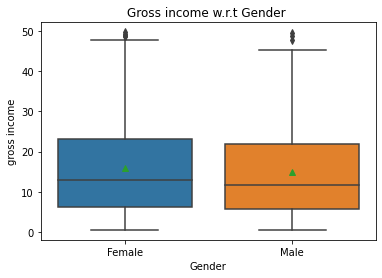

In [38]:
#Gross income according to Customer type
sns.boxplot(x = df['Gender'],
            y = df['gross income'],showmeans=True).set_title('Gross income w.r.t Gender ')

There is not much difference in gross income from Female & Male, althought Females spend little more than Male.

Text(0.5, 1.0, 'Gross income w.r.t Product')

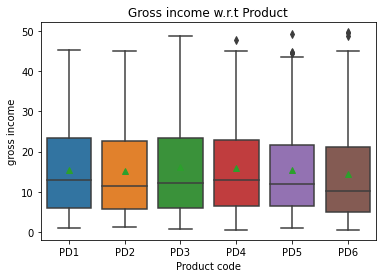

In [39]:
#Gross income according to Product 
sns.boxplot(x = df['Product code'],
            y = df['gross income'],showmeans=True).set_title('Gross income w.r.t Product')

Gross income of PD2 and PD6 is low compare to other product categories. PD3 has highest gross income.

Text(0.5, 1.0, 'Total income w.r.t Product')

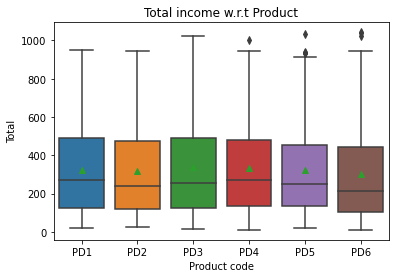

In [40]:
#Total income according to Product 
sns.boxplot(x = df['Product code'],
            y = df['Total'],showmeans=True).set_title('Total income w.r.t Product')

Total of PD6 & PD2 is low compare to other Product Categories.

# Quantity inspection

Text(0.5, 1.0, 'Quantity w.r.t Branch  ')

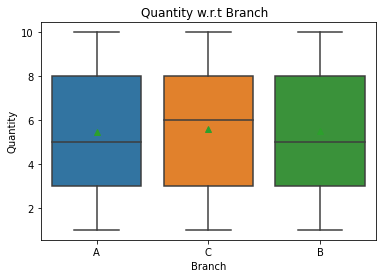

In [100]:
#Gross income according to Branch
sns.boxplot(x = df['Branch'],
            y = df['Quantity'],showmeans=True).set_title('Quantity w.r.t Branch  ')

Text(0.5, 1.0, 'Sales trend')

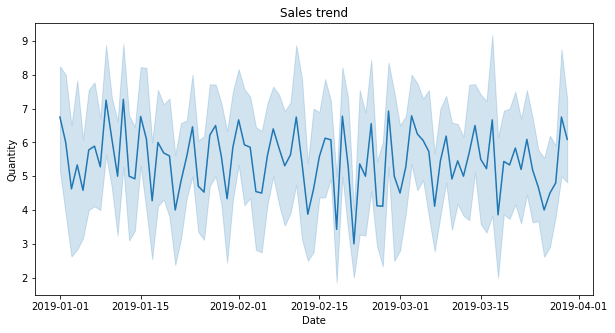

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x="Date",  y = 'Quantity',data =df,ax=ax)
plt.title("Sales trend")



Sales of Products does not follows any trend. But we can see huge fluctuations in trend in 2nd month.

In [42]:
#Product sales according to number of Quantities sold
Product_sales= df.groupby(['Product code'])['Quantity'].sum().to_frame()

#Groupby function will give result in array, so here we are converting array to column by reseting index
Product_sales=Product_sales.reset_index()

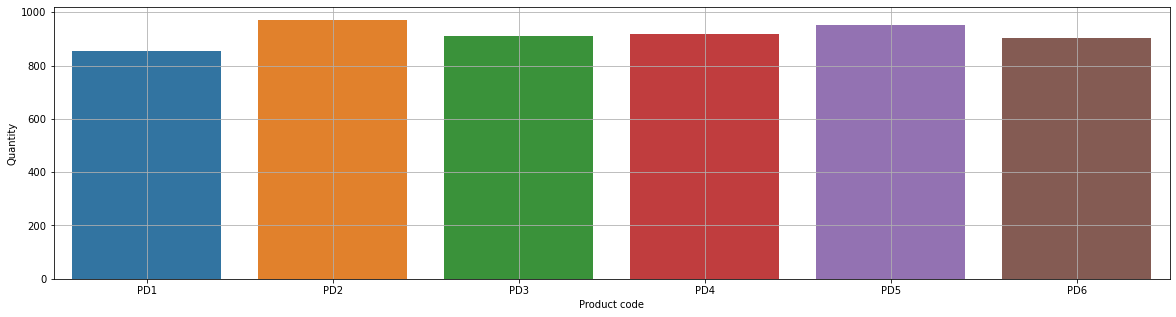

In [43]:
#Distribution of sales among different Products according to products

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="Product code", y="Quantity", data=Product_sales)
plt.grid()

PD1 has lowest sales compare to other products. PD2 & PD5 has highest sales.

In [44]:
df['weekday'] = df['Date'].dt.dayofweek     #extract Weekdays from Date
df['weekday'].unique()

array([5, 4, 6, 0, 3, 2, 1], dtype=int64)

0- Monday, 1- Tuesday, 2- Wednesday, 3- Thursday, 4- Friday, 5- Saturday, 6- Sunday

Text(0.5, 1.0, 'Sales on Weekdays')

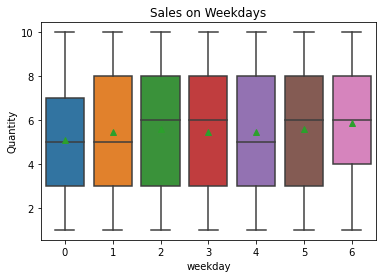

In [45]:
sns.boxplot(x = df['weekday'],
            y = df['Quantity'],showmeans=True).set_title('Sales on Weekdays')

On Monday,Tuesday & Friday sales are very low compare to other days. On sunday most of the transactions buy atleast bought 4 products together. Most of the sales are happening at the weekend and middle of the week.

In [46]:
df['Time']=df['Time'].astype('str')     #converting time to string to pull out Hour
df['Hour'] = df['Time'].str[:2]         #Creating Hour column with first two strings which are Hour of Time
df['Hour']=df['Hour'].astype('int')     #Converting the string to integer.

In [47]:
#defining a function to break a day into 6 sessions/periods using elif condition.
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'                 #Creating sessions with conditions based on Hour Early morning, morning,noon,eve,night,late night.
    if (x > 8) and (x<=12):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

df['session'] = df['Hour'].apply(f)               #Creating a session column based on Hour.
df.head()

,Invoice ID,Branch,City_code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,Hour,session
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,13,Noon
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,4,10,Morning
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,6,13,Noon
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,6,20,Eve
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,4,10,Morning


In [48]:
#Sum of quantity w.r.t session using group by and stored in dist_session
dist_session=df.groupby(['session'])['Quantity'].sum().to_frame()

#Groupby function will give result in array, so here we are converting array to column by reseting index
dist_session=dist_session.reset_index()

Sales=dist_session.Quantity   #selecting Quantity from grouped dist_session
Session=dist_session.session   #selection session from grouped dist_session

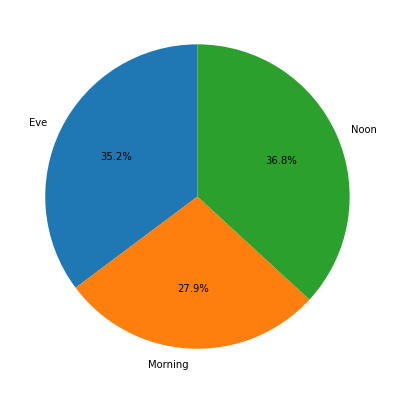

In [49]:

fig = plt.figure(figsize =(10, 7))

plt.pie(Sales, autopct='%1.1f%%',labels = Session, startangle=90)  #autopct is for annotation, starangle is angle of plot
plt.show()


Most of the sales are in Afternoon. And morning has less compare to other part of the day.

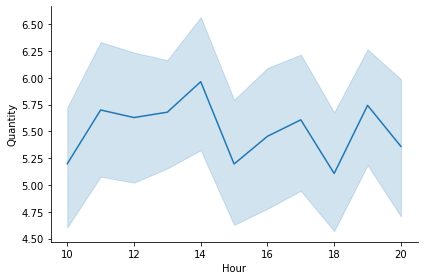

In [50]:
# Peak hour sales

ax=sns.relplot(data=df, x="Hour", y="Quantity",kind="line", height=4, aspect=1.5)


Most of the sales are happening around 2pm. The store opens at 10am and close at 8pm. 

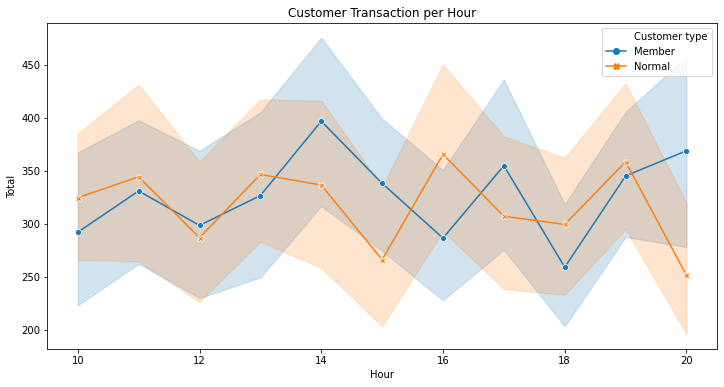

In [79]:
plt.figure(figsize=(12,6))
plt.title('Customer Transaction per Hour')
sns.lineplot(data=df,x='Hour',y='Total',hue='Customer type',markers=True,style='Customer type',dashes=False); 

The Normal customers and the members like to shop around noon but members have the highest number of transactions at 2 pm.
Around 4 pm and 7 pm, the normal customers shop the most.

In [51]:
#storing it to Branch sales variable
Branch_sales= df.groupby(['Branch','Product code'])['Quantity'].sum().to_frame()

#Groupby function will give result in array, so here we are converting array to column by reseting index
Branch_sales=Branch_sales.reset_index()

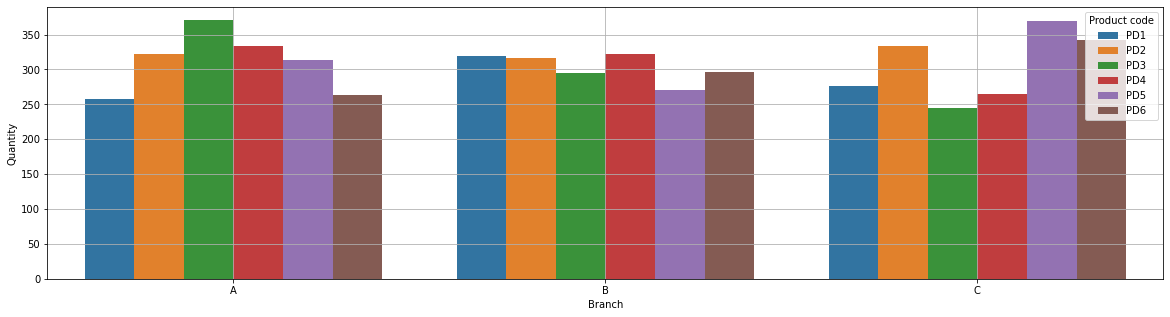

In [52]:
#Distribution of sales among different Branches in different Product code?

fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x="Branch", y="Quantity", data=Branch_sales,hue='Product code')    #barplot with seaborn on grouped data
plt.grid()

PD3 has highest sales and PD1 has lowest sales in Branch A. Branch B has highest sales in PD4 and lowest in PD5. Branch C has highest sales in PD5 and lowest sales in PD3.

Here we can observe PD3 has highest sales in Branch A but lowest sales in Branch C. And PD5 has highest sales in Branch C but lowest sales in Branch B

In [53]:
# Sum of Quantity w.r.t Product for each session using groupby
session_sales= df.groupby(['session','Product code'])['Quantity'].sum().to_frame()

#Groupby function will give result in array, so here we are converting array to column by reseting index
session_sales=session_sales.reset_index()

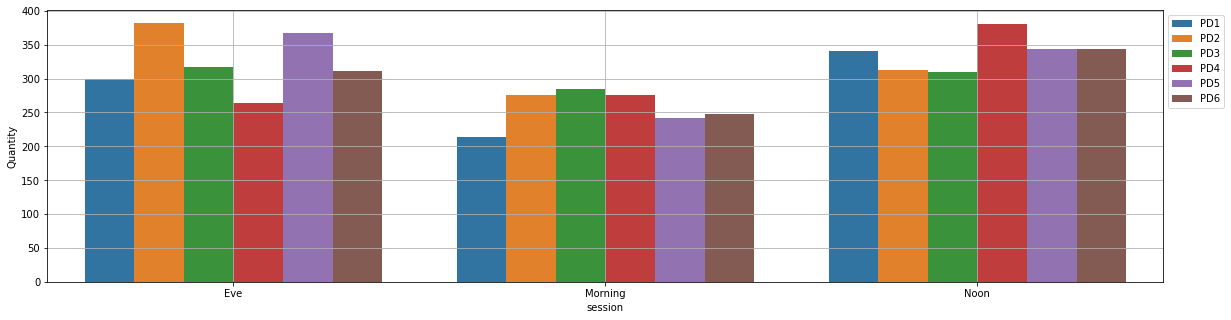

In [54]:
# products sold at different times of the day.
plt.subplots(figsize=(20,5))
sns.barplot(x="session", y="Quantity", data=session_sales,hue='Product code')
plt.grid()
plt.legend(loc = 2, bbox_to_anchor = (1,1)) #for labeling the products


PD2 has highest sales in Evening. PD3 has highest sales in Morning and PD4 sales has highest sales in Afternoon.

In [55]:
# Sum of Quantity w.r.t Product for Male & Female using groupby
Gender_sales= df.groupby(['Gender','Product code'])['Quantity'].sum().to_frame()

#Groupby function will give result in array, so here we are converting array to column by reseting index
Gender_sales=Gender_sales.reset_index()

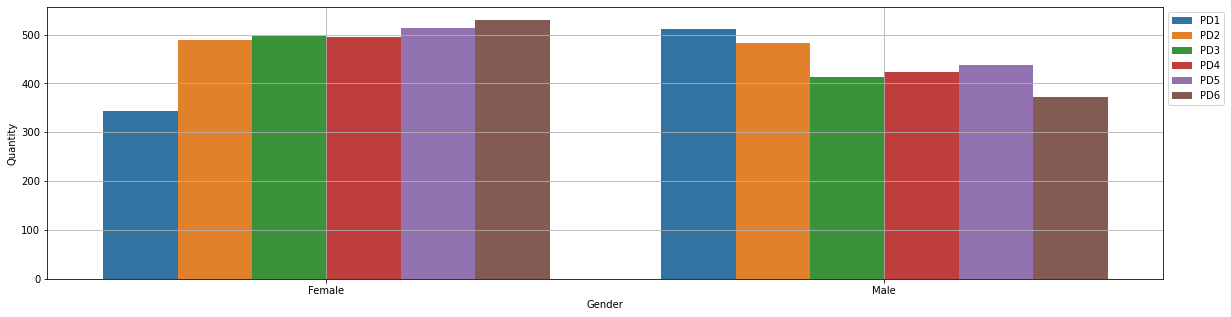

In [56]:
# products bought by Male and female.
plt.subplots(figsize=(20,5))
sns.barplot(x="Gender", y="Quantity", data=Gender_sales,hue='Product code')
plt.grid()
plt.legend(loc = 2, bbox_to_anchor = (1,1)) #for labeling the products


PD1 is bought less from females but highly bought by Males. And PD6 is highly bought by Females whereas least bought by Males.

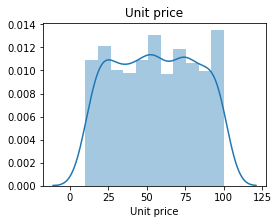

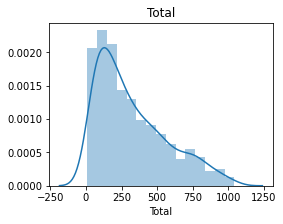

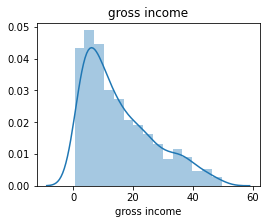

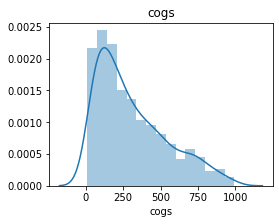

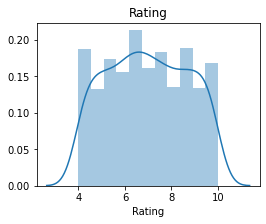

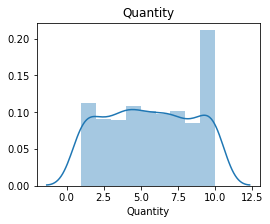

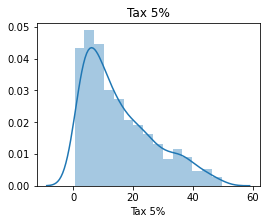

In [102]:
#creating a variable which has numerical variables to check correlation

Num_Col = df[['Unit price','Total','gross income','cogs','Rating','Quantity','Tax 5%']]

#creating a loop to plot distribution of Num_Col to check best suitable approach for correaltion.
for i in (Num_Col):
    
    plt.figure(figsize=(4,3))
    plt.title(i)
    sns.distplot(Num_Col[i], kde=True)

Unit price,Quantity and Rating looks uniform. but cogs , gross income,Tax and Total are right skewed. Most of the customers bought 10 quantity at a time.

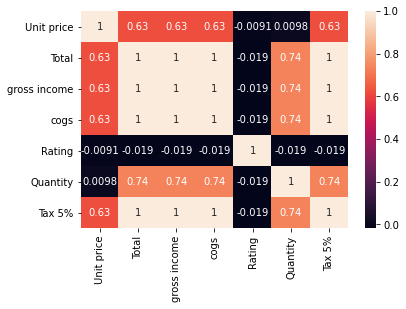

In [103]:
corr = Num_Col.corr(method = 'spearman') #using spearman correlation because all the variables are not not normally distributed.

sns.heatmap(corr, annot = True)
plt.show()



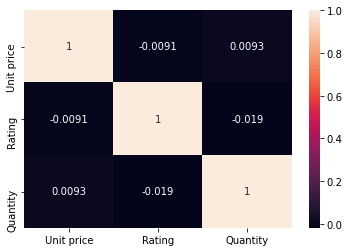

In [99]:
Normal_Col= Num_Col[['Unit price','Rating','Quantity']]  #Pearson correlation for normally distributed columns
corr = Normal_Col.corr(method = 'pearson')

sns.heatmap(corr, annot = True)
plt.show()



The Unit price is slightly negatively correlated to Rating and positively correlated with cogs, gross income, total. Total ,cogs,gross income are highly correlated to each other. Quantity is positively correlated with Total, gross income,cogs.

# Summary

Branch A has highest customers.
Branch C has highest sales, gross income, rating but lowest customers.

Most of the customers prefer paying through cash & E-wallet.

Gross income margin percentage is constant for all transactions 4.76%.

Product PD6 is bought most of the time in all transactions whereas PD1 is bought least.

PD2 & PD5 has highest sales but PD2 has lowest rating.
Though PD1 has highest gross income & rating is more than average,sales are low.

Branch A has highest sales of PD3 but lowest sales in Branch C.
Branch C has highest sales in PD5 but lowest sales in Branch B.

PD1 is bought less from females but highly bought by Males. And PD6 is highly bought by Females whereas least bought by Males.

The Normal customers and the members like to shop around noon but members have the highest number of transactions at 2 pm. Around 4 pm and 7 pm, the normal customers shop the most.

On Monday,Tuesday & Friday sales are very low compare to other days. On sunday most of the transactions buy atleast bought 4 products together. Most of the sales are happening at the weekend and middle of the week.



Branch C has high sales,gross income, rating but lowest customers, So branch C should do more marketing to bring the customers. PD3 has lowest sales in Branch C but high sales in Branch A. So branch C should also look for the reason of lowest sales of PD3.